# Assignment: Trees
Do three questions.

In [34]:
! git clone https://github.com/ds4e/trees

fatal: destination path 'trees' already exists and is not an empty directory.


**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

Trees are constructed with a set of decision nodes, a set of edges representing choices, and a set of terminal nodes/outcomes at the bottom. Trees are constructed using data and this algorithm produces an end outcome based on the path made through the tree - after a series of mini classifications/decisions at each point. The data is split into subsets based on feature values.   

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Trees can handle relationships between variables regardless of whether or not they are linear because they just recognize the patterns and interactions in the data. For example, a tree can learn that an outcome happens when X is low and Y is high without needing that relationship to be linear. Linear models require that the variables have a linear relationship and will produce a biased and unreliable model if this is not met - variables without a linear relationship must be transformed (often using the log) to meet this requirement.

3. Why is the Gini a good loss function for categorical target variables?

The Gini is a good loss function for categorical target variables because it measures purity directly, meaning that a Gini of 0 indicates a pure node. Gini also finds a good balance between purity of nodes and the side of model. Gini also aligns with the goal of classification by grouping smaller things and is relatively logical and easy to understand.

4. Why do trees tend to overfit, and how can this tendency be constrained?

Decision trees tend to overfit because they can keep splitting the data into smaller and smaller subsets, eventually capturing noise and irrelevant patterns. This creates deep trees that fit the training data very well but generalize poorly to the test data. To fix this, we can prune the tree (cut back unnecessary branches), set limits on tree depth or minimum samples per leaf, or use other methods like random forests or boosting to reduce variance.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False - Decision trees can perform well with both categorical and continuous variables because they can split on any type of feature. For continuous features, they find optimal thresholds to split (e.g., "X > 7.5"), and for categorical features, they can split based on category membership. Trees are flexible, making them effective in many types of data scenarios—not just ones dominated by categorical variables.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Most implementations use binary splits because they simplify the algorithm and allow for more flexible, specific divisions. Multiple branches can lead to an explosion in options and more complex trees that are harder to optimize and interpret. Also, binary splits can simulate multi-way splits by repeatedly applying them, so there's often no need for more than two at a time.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

If a tree is very deep with many nodes and branches, and nearly pure leaves, it may be overfitting—especially if performance drops significantly on validation data. On the other hand, if a tree is very shallow with high training error and poor performance on both training and test data, it’s probably underfitting. Comparing training vs. validation accuracy and looking for signs of high variance (overfitting) or high bias (underfitting) are common heuristics.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/trees/assignment/data/cars_hw.csv') # Load divorce data
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [36]:
df = pd.get_dummies(df, columns=['Make', 'Color', 'Body_Type', 'No_of_Owners','Fuel_Type', 'Transmission',
                                 'Transmission_Type'], drop_first=True)

from sklearn.model_selection import train_test_split

# Process data:
y = df['Price'] # Target variable
X = df.drop(['Price','Unnamed: 0'], axis=1) # Features/predictors

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [37]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error

# Iterate over min_samples_leaf values
r2_scores = []
for i in range(1, 26):
    tree = DecisionTreeRegressor(min_samples_leaf=i, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Find the best min_samples_leaf
best_min_samples_leaf = np.argmax(r2_scores) + 1
print(f"Best min_samples_leaf: {best_min_samples_leaf}")
print(f"Highest R-squared: {np.max(r2_scores)}")

# the best min_sample_leaf is 5 with an R-squared of 0.822


Best min_samples_leaf: 5
Highest R-squared: 0.8228418832488933


In [38]:
tree_reg = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
tree_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R^2: 0.8228
RMSE: 142545.56


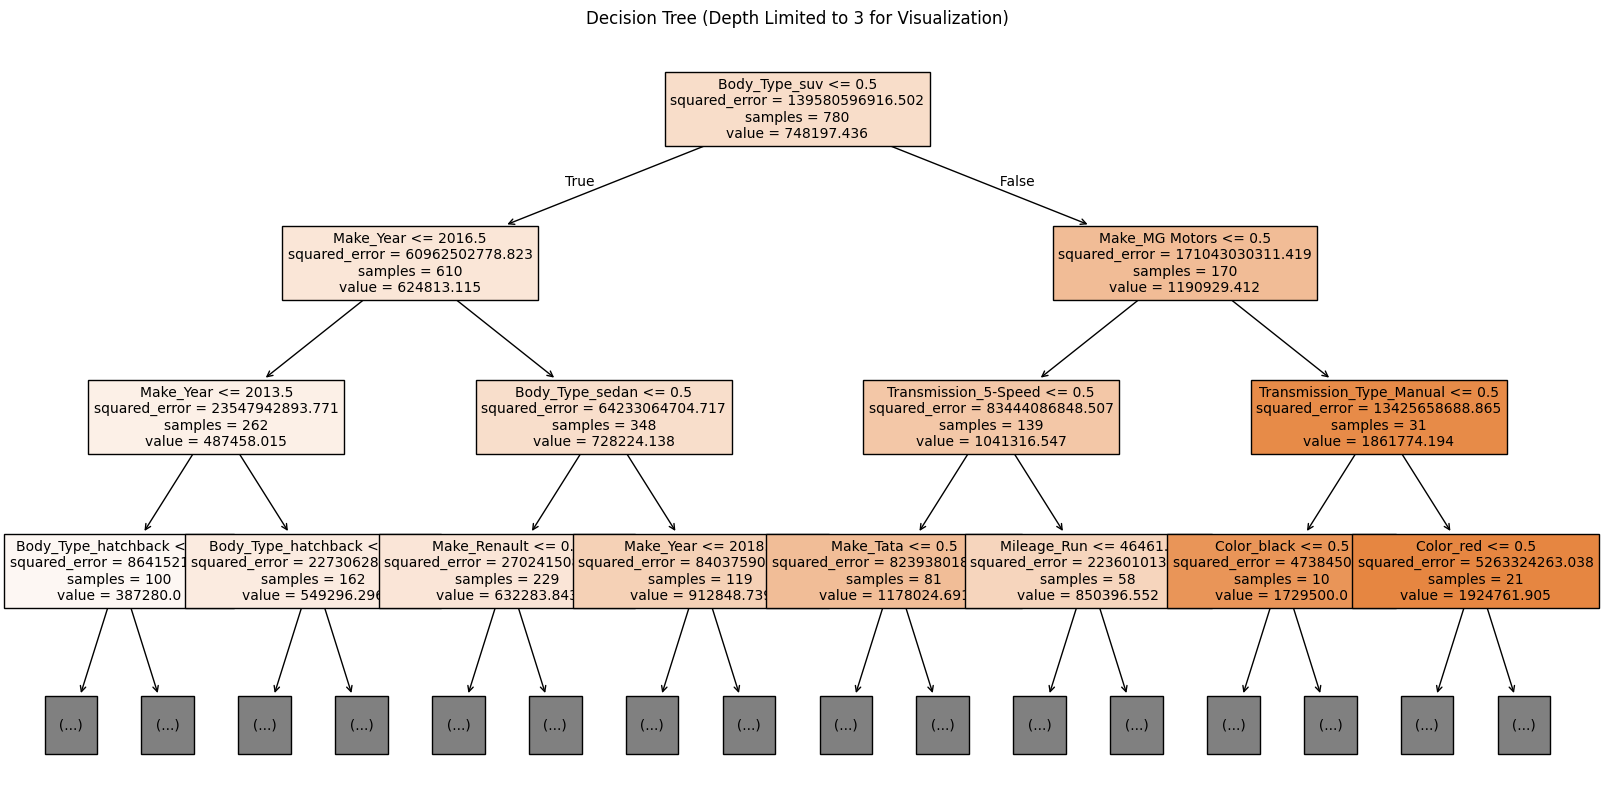

In [39]:
plt.figure(figsize=(20, 10))
plot_tree(tree_reg, feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree (Depth Limited to 3 for Visualization)")
plt.show()

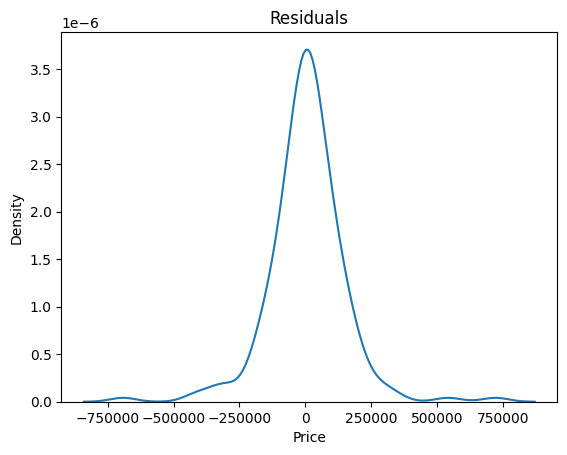

In [40]:
e = y_test - y_pred
sns.kdeplot(e).set(title='Residuals')
plt.show()
# the residuals are centered around 0 and they are symmetric

In [41]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the linear regression model
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print(f"Linear Regression R^2: {r2_lin:.4f}")
print(f"Linear Regression RMSE: {rmse_lin:.2f}")

# Compare the models
print(f"\nDecision Tree R^2: {r2:.4f}")
print(f"Decision Tree RMSE: {rmse:.2f}")

# the decision tree performs slightly better than linear regression, with a higher R-squared value
# the regression tree performs better because it does not assume linearity and handles categorical variables (our dummy variables)
# more intuitively as a decision, rather than some value between 0 and 1. The tree also captures interaction terms/relationships naturally
# whereas a linear regression would need us to make these interaction terms.

Linear Regression R^2: 0.8203
Linear Regression RMSE: 143575.20

Decision Tree R^2: 0.8228
Decision Tree RMSE: 142545.56


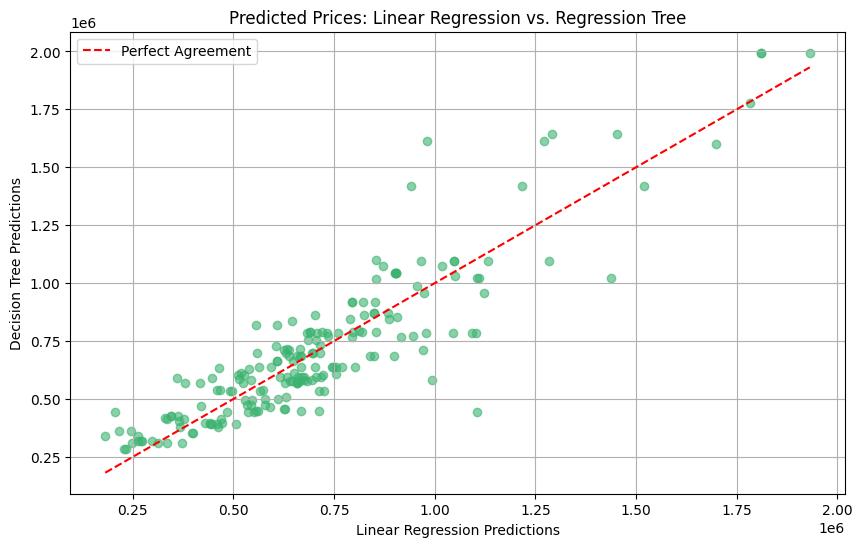

In [42]:
# Predictions from both models
y_pred_tree = tree_reg.predict(X_test)
y_pred_lin = lin_reg.predict(X_test)

# Plot predictions from both models
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lin, y_pred_tree, alpha=0.6, color="mediumseagreen")
plt.plot([min(y_pred_lin), max(y_pred_lin)], [min(y_pred_lin), max(y_pred_lin)],
         color='red', linestyle='--', label='Perfect Agreement')
plt.title("Predicted Prices: Linear Regression vs. Regression Tree")
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Decision Tree Predictions")
plt.legend()
plt.grid(True)
plt.show()

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/trees/assignment/data/corporate_ratings.csv') # Load divorce data
print(df.info())
# 2029 observations and 31 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

In [44]:
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


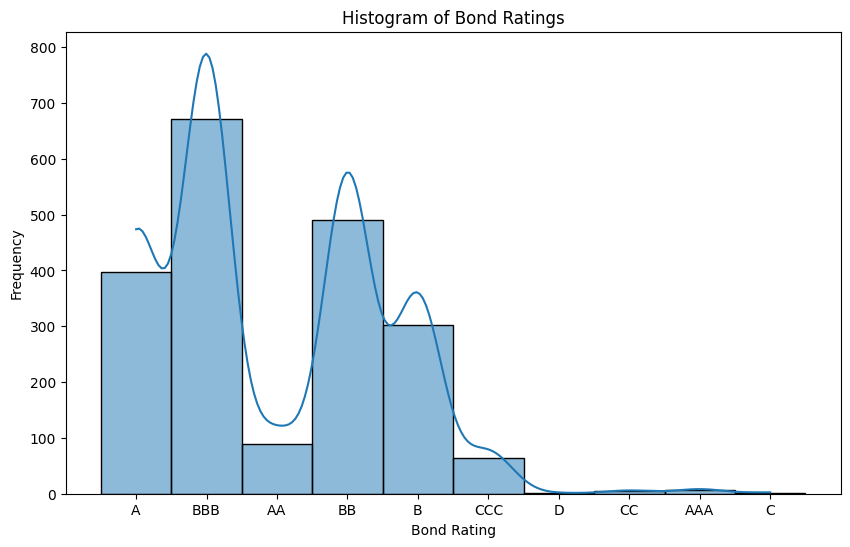

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True)
plt.title('Histogram of Bond Ratings')
plt.xlabel('Bond Rating')
plt.ylabel('Frequency')
plt.show()

In [46]:
rating_map = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C'
}

# Apply mapping (others will remain unchanged unless specified)
df['Rating'] = df['Rating'].map(rating_map).fillna(df['Rating'])

df.head(20)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,B,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,B,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,B,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,B,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
5,A,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/18/2014,Energy,1.741958,1.317156,0.220796,83.931968,...,0.252389,0.644841,5.574517,5.792278,1.767609,0.157246,9.833295,8.644788,0.230445,4.044776
6,A,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,5/13/2014,Energy,1.939002,1.468909,0.256710,92.705452,...,0.270057,0.597160,4.417989,6.326531,1.700068,0.151173,12.140376,7.398337,0.216233,3.998076
7,A,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/23/2015,Energy,1.905814,1.544791,0.197791,90.336857,...,0.258938,0.726292,5.047356,10.287293,1.908484,0.081212,15.264562,6.949487,0.248203,3.665200
8,A,Honeywell International Inc.,HON,Egan-Jones Ratings Company,4/29/2014,Capital Goods,1.492419,1.129822,0.452859,74.102804,...,0.267923,0.781546,4.308240,10.291200,2.601191,0.138574,10.897998,5.512462,0.110997,5.482026
9,A,Honeywell International Inc.,HON,Moody's Investors Service,2/16/2016,Capital Goods,1.091557,0.850961,0.296935,76.394469,...,0.264045,0.803264,5.618107,9.692229,2.697369,0.170706,10.362903,6.994101,0.141365,4.793369


In [51]:
pd.get_dummies(df, columns=['Sector'], drop_first=True)
X = df.drop(['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name','Sector'], axis=1)
X.head()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X = X.fillna(0)
y = df['Rating']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
tree_clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred = tree_clf.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy: {accuracy}")

# the accuracy is about 0.7, which is fairly high

Confusion Matrix:
[[ 49  47   0   0]
 [ 52 234   8   0]
 [  1  11   3   0]
 [  0   1   0   0]]

Accuracy: 0.7044334975369458


**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?